# K-Moads for Item 

In [12]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from category_encoders import BinaryEncoder, TargetEncoder
from sklearn.feature_extraction import FeatureHasher
from kmodes.kprototypes import KPrototypes
import plotly.express as px


In [13]:
item = pd.read_csv(
    '../../datasets/ml-100k/u.item',
    sep='|',
    encoding='latin-1', 
    names=[
        'movie_id', 'title', 'release_date', 'video_release_date', 'IMDb_url',
        'unknown', 'Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime',
        'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
        'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'
    ]
)
item = item.drop(columns='IMDb_url')
item = item.drop(columns='video_release_date')
item = item.drop(columns='release_date')

print(item.head())


   movie_id              title  unknown  Action  Adventure  Animation  \
0         1   Toy Story (1995)        0       0          0          1   
1         2   GoldenEye (1995)        0       1          1          0   
2         3  Four Rooms (1995)        0       0          0          0   
3         4  Get Shorty (1995)        0       1          0          0   
4         5     Copycat (1995)        0       0          0          0   

   Children's  Comedy  Crime  Documentary  ...  Fantasy  Film-Noir  Horror  \
0           1       1      0            0  ...        0          0       0   
1           0       0      0            0  ...        0          0       0   
2           0       0      0            0  ...        0          0       0   
3           0       1      0            0  ...        0          0       0   
4           0       0      1            0  ...        0          0       0   

   Musical  Mystery  Romance  Sci-Fi  Thriller  War  Western  
0        0        0        0 


Metrica: hamming
  k=2, silhouette score=0.3367
  k=3, silhouette score=0.3342
  k=4, silhouette score=0.3197
  k=5, silhouette score=0.3281
  k=6, silhouette score=0.3659
  k=7, silhouette score=0.4079
  k=8, silhouette score=0.4232
  k=9, silhouette score=0.4004
  k=10, silhouette score=0.3664
  -> Miglior k: 8 con silhouette score: 0.4232


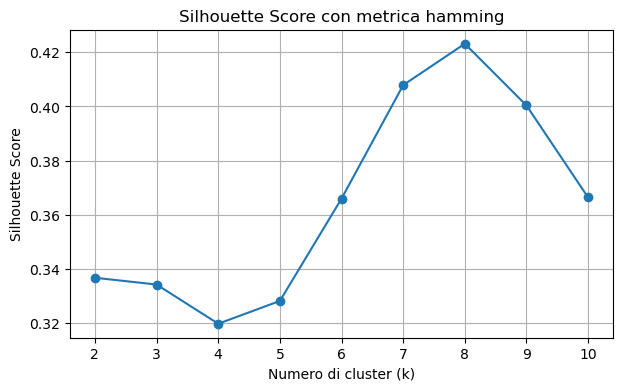


Metrica: jaccard
  k=2, silhouette score=0.1181
  k=3, silhouette score=0.1194
  k=4, silhouette score=0.0943
  k=5, silhouette score=0.2851
  k=6, silhouette score=0.3285
  k=7, silhouette score=0.3440
  k=8, silhouette score=0.3453
  k=9, silhouette score=0.3419
  k=10, silhouette score=0.3327
  -> Miglior k: 8 con silhouette score: 0.3453


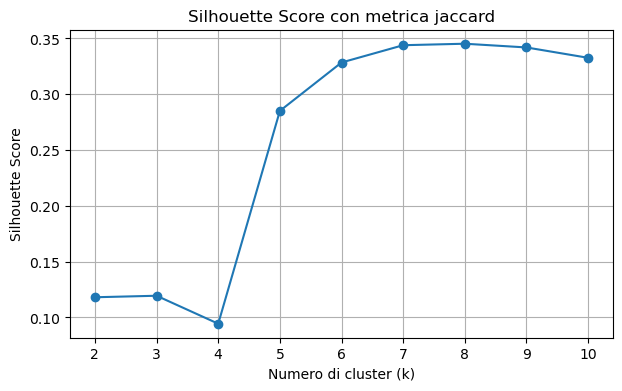


Metrica: dice
  k=2, silhouette score=0.1222
  k=3, silhouette score=0.1136
  k=4, silhouette score=0.0775
  k=5, silhouette score=0.3133
  k=6, silhouette score=0.3600
  k=7, silhouette score=0.3885
  k=8, silhouette score=0.3851
  k=9, silhouette score=0.3785
  k=10, silhouette score=0.3580
  -> Miglior k: 7 con silhouette score: 0.3885


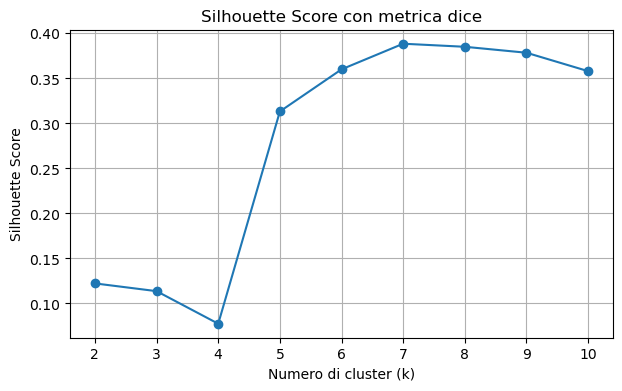


Metrica: sokalmichener
  k=2, silhouette score=0.3072
  k=3, silhouette score=0.3069
  k=4, silhouette score=0.2938
  k=5, silhouette score=0.3208
  k=6, silhouette score=0.3567
  k=7, silhouette score=0.3939
  k=8, silhouette score=0.4084
  k=9, silhouette score=0.3881
  k=10, silhouette score=0.3589
  -> Miglior k: 8 con silhouette score: 0.4084


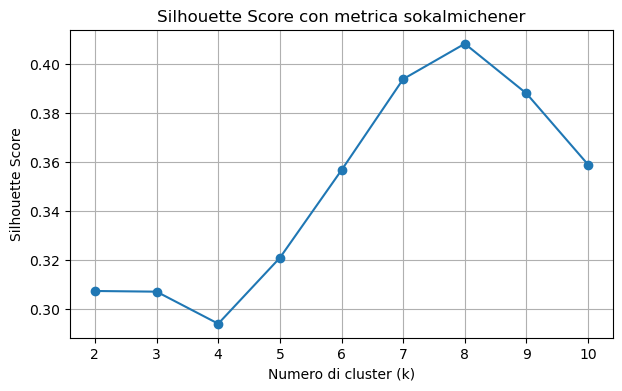


Metrica: russellrao
  k=2, silhouette score=0.0063
  k=3, silhouette score=0.0051
  k=4, silhouette score=-0.0038
  k=5, silhouette score=0.0163
  k=6, silhouette score=0.0182
  k=7, silhouette score=0.0238
  k=8, silhouette score=0.0212
  k=9, silhouette score=0.0215
  k=10, silhouette score=0.0194
  -> Miglior k: 7 con silhouette score: 0.0238


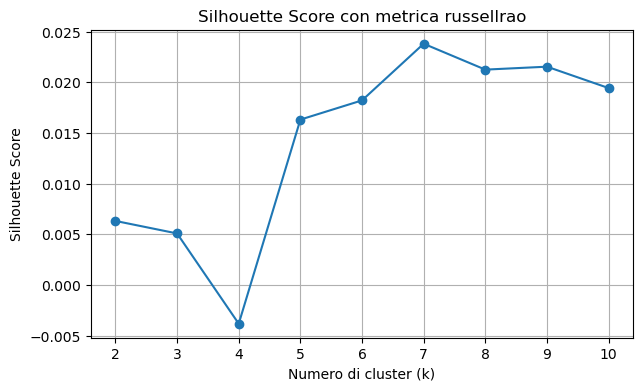

In [14]:
from kmodes.kmodes import KModes
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
import numpy as np

generi = [
    'unknown', 'Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime',
    'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
    'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'
]
X = item[generi].astype(str)
X_num = item[generi].astype(int).values

metriche = ['hamming', 'jaccard', 'dice', 'sokalmichener', 'russellrao']

for metrica in metriche:
    print(f'\nMetrica: {metrica}')
    dist_matrix = squareform(pdist(X_num, metric=metrica))
    
    silhouette_scores = []
    K = range(2, 11)
    for k in K:
        km = KModes(n_clusters=k, init='Cao', verbose=0, random_state=42)
        labels = km.fit_predict(X)
        score = silhouette_score(dist_matrix, labels, metric='precomputed')
        silhouette_scores.append(score)
        print(f'  k={k}, silhouette score={score:.4f}')
    
    best_k = K[np.argmax(silhouette_scores)]
    best_score = max(silhouette_scores)
    print(f'  -> Miglior k: {best_k} con silhouette score: {best_score:.4f}')
    
    # Grafico
    plt.figure(figsize=(7,4))
    plt.plot(K, silhouette_scores, marker='o')
    plt.title(f'Silhouette Score con metrica {metrica}')
    plt.xlabel('Numero di cluster (k)')
    plt.ylabel('Silhouette Score')
    plt.grid(True)
    plt.show()


d:\Download\Miniconda\Anaconda\envs\FDSML\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
d:\Download\Miniconda\Anaconda\envs\FDSML\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


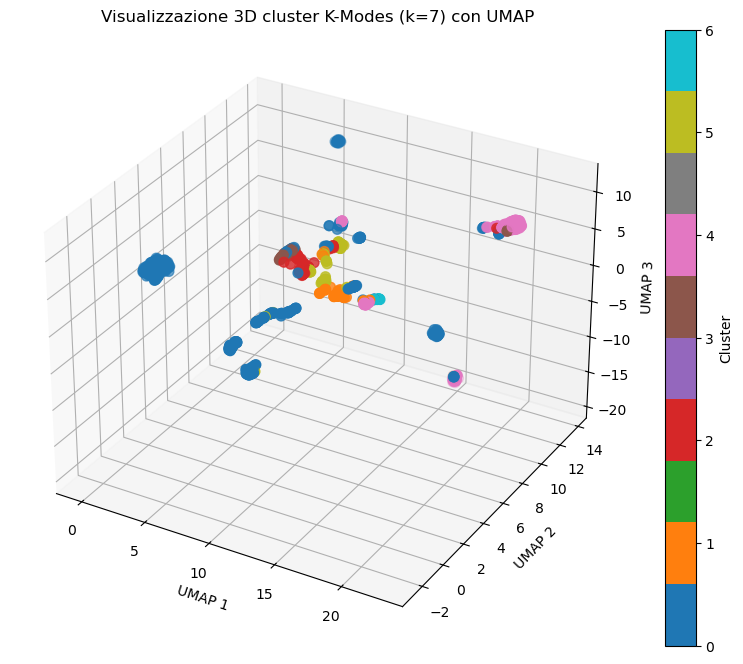

In [15]:
import umap
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # necessario per il 3D plot

# Calcola i cluster con il miglior k
km_best = KModes(n_clusters=best_k, init='Cao', verbose=0, random_state=42)
best_labels = km_best.fit_predict(X)
item['cluster_kmodes'] = best_labels

# Riduzione dimensionale con UMAP per 3 dimensioni
reducer = umap.UMAP(n_components=3, random_state=42)
embedding = reducer.fit_transform(X_num)

# Grafico 3D dei cluster
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    embedding[:,0], embedding[:,1], embedding[:,2],
    c=item['cluster_kmodes'], cmap='tab10', s=50
)

ax.set_title(f'Visualizzazione 3D cluster K-Modes (k={best_k}) con UMAP')
ax.set_xlabel('UMAP 1')
ax.set_ylabel('UMAP 2')
ax.set_zlabel('UMAP 3')

fig.colorbar(scatter, ax=ax, label='Cluster')

plt.show()
